In [49]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [50]:
df = pd.read_csv("train.csv")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [52]:
df.sample(5)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
17443,1037,GRD,M,34,Y,Y,0,0,4,2,3,115000,Y,0
10379,104699,GRD,F,61,N,N,0,1,4,2,3,36000,N,0
54562,42845,GRD,F,51,Y,Y,0,0,3,1,2,47000,N,1
64682,104525,GRD,M,37,N,N,0,0,2,2,3,50000,N,0
48860,101019,SCH,F,32,N,N,0,1,4,2,3,50000,N,0


| feature | description |
| :- | :- |
| client_id | идентификатор клиента |
| education	| уровень образования |
| sex	| пол заёмщика |
| age	| возраст заёмщика |
| car	| флаг наличия автомобиля |
| car_type	| флаг автомобиля-иномарки |
| decline_app_cnt	| количество отказанных прошлых заявок |
| good_work	| флаг наличия «хорошей» работы |
| bki_request_cnt	| количество запросов в БКИ |
| work_address	| категоризатор рабочего адреса |
| home_address	| категоризатор домашнего адреса |
| income	| доход заёмщика |
|foreign_passport	| наличие загранпаспорта |
| default	| наличие дефолта |

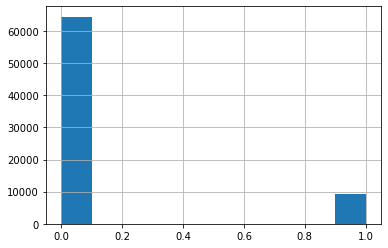

In [53]:
df.default.hist()

In [54]:
df.isnull().sum(axis = 0)

client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

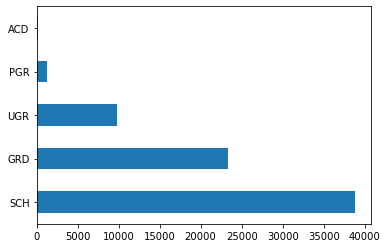

In [55]:
df.education.value_counts().plot.barh()

In [56]:
df.education.value_counts()

SCH    38860
GRD    23365
UGR     9816
PGR     1257
ACD      194
Name: education, dtype: int64

In [57]:
df.education = df.education.fillna("UNK")

In [58]:
bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']
cat_cols = ['education', 'home_address', 'work_address']
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

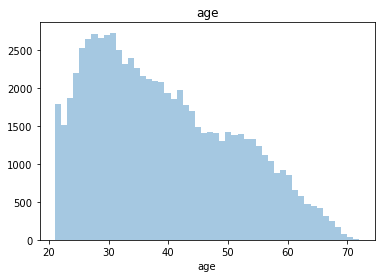

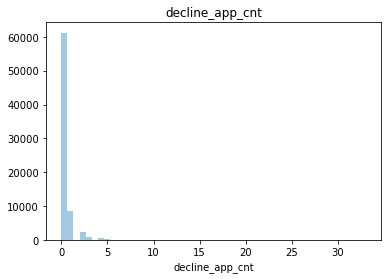

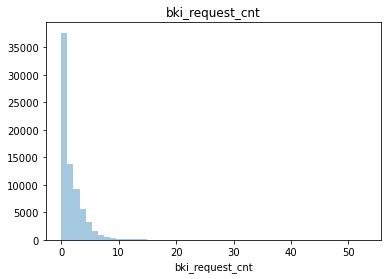

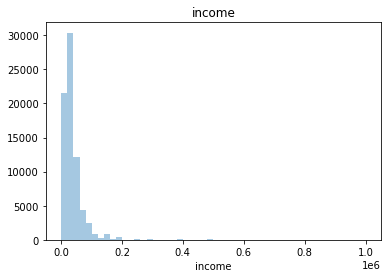

In [59]:
def hist_num():
    for c in num_cols:    
        plt.figure()
        sns.distplot(df[c], kde=False, rug=False)
        plt.title(c)
        plt.show()
        #df.hist(column = c, ax = plt.subplot(2, 2, i))        
hist_num()

In [60]:
for c in num_cols:
    df[c] = np.log(df[c]+1)

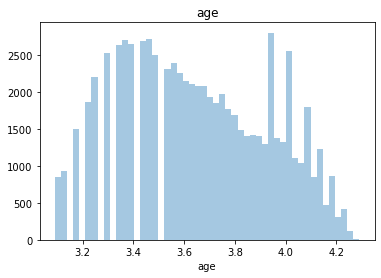

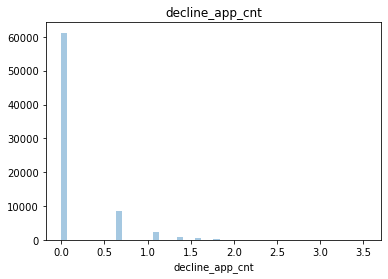

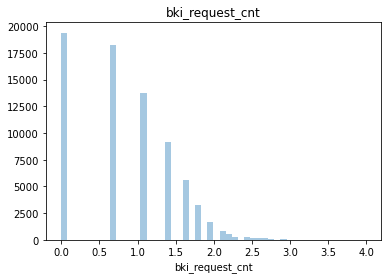

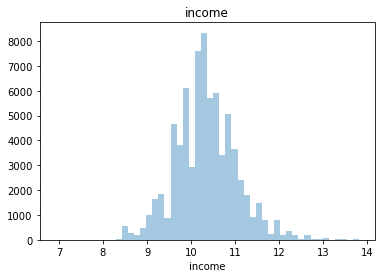

In [61]:
hist_num()

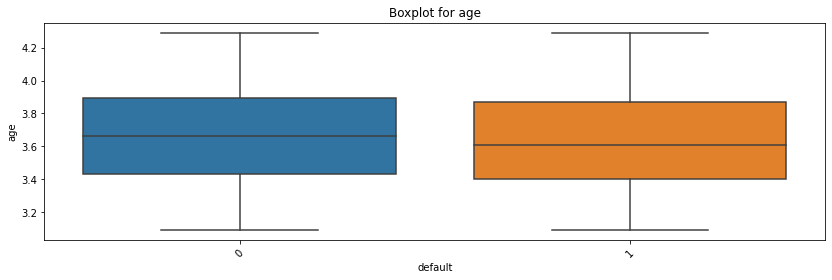

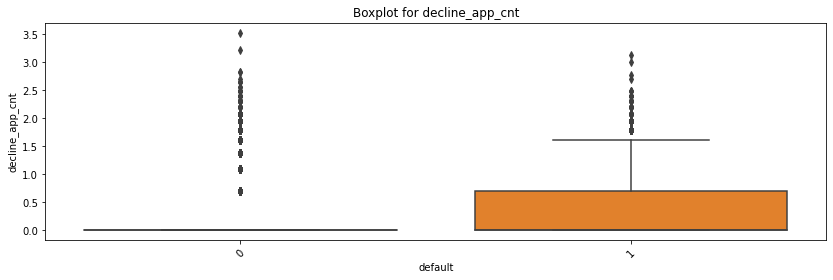

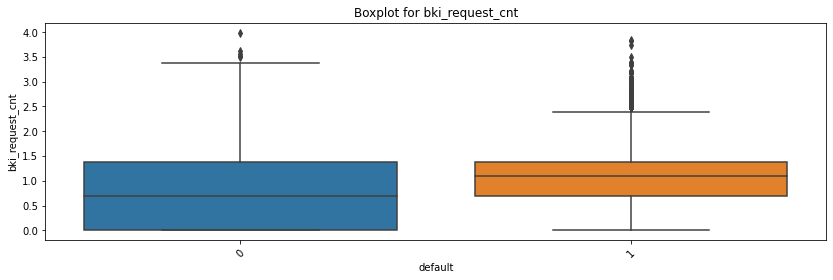

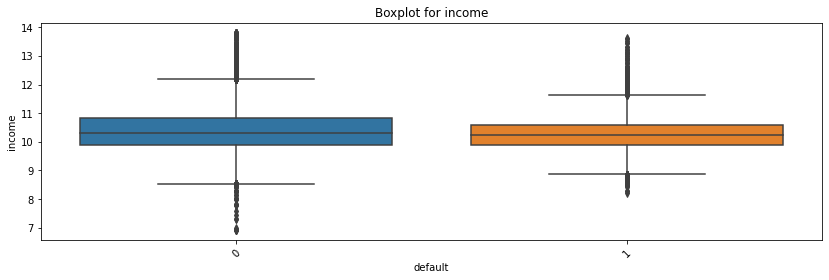

In [62]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x='default', y=column, 
                data=df,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for c in num_cols:
    get_boxplot(c)

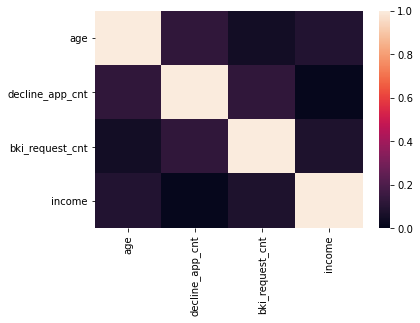

In [64]:
sns.heatmap(df[num_cols].corr().abs(), vmin=0, vmax=1)

Слабая корелляция численных переменных

In [69]:
f_classif(df[num_cols], df['default'])

(array([  50.3805738 , 1152.93731744,  457.59176046,  214.7905274 ]),
 array([1.27778005e-012, 8.96214000e-251, 3.26668128e-101, 1.44923016e-048]))

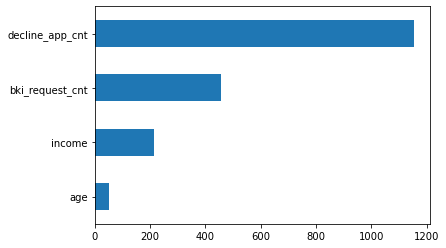

In [66]:
imp_num = Series(f_classif(df[num_cols], df['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [70]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    df[column] = label_encoder.fit_transform(df[column])
    
# убедимся в преобразовании    
df.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,1,4.143135,1,1,0.000000,0,0.693147,1,2,9.798183,0,0
1,63161,SCH,0,4.094345,0,0,0.000000,0,1.386294,2,3,9.852247,0,0
2,25887,SCH,1,3.258097,1,0,1.098612,0,0.693147,1,2,10.308986,1,0
3,16222,SCH,0,3.988984,0,0,0.000000,0,1.098612,2,3,9.210440,0,0
4,101655,GRD,1,3.891820,0,0,0.000000,1,0.693147,2,3,10.308986,1,0


In [75]:
edu_label_encoder = LabelEncoder()

df['education'] = edu_label_encoder.fit_transform(df['education'])
df.head()

array(['ACD', 'GRD', 'PGR', 'SCH', 'UGR', 'UNK'], dtype=object)

In [76]:
print(dict(enumerate(edu_label_encoder.classes_)))

{0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR', 5: 'UNK'}


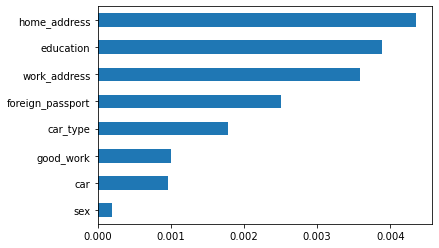

In [77]:
imp_cat = Series(mutual_info_classif(df[bin_cols + cat_cols], df['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [78]:
X_cat = OneHotEncoder(sparse = False).fit_transform(df[cat_cols].values)

In [79]:
X_cat

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [80]:
X_cat.shape

(73799, 12)

In [82]:
df.home_address.value_counts()

2    39956
1    32585
3     1258
Name: home_address, dtype: int64

In [83]:
X_num = StandardScaler().fit_transform(df[num_cols].values)

In [84]:
X = np.hstack([X_num, df[bin_cols].values, X_cat])
Y = df['default'].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [93]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

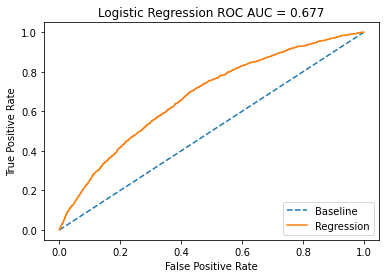

In [94]:
def show_model_result(model, X_test, y_test):
    probs = model.predict_proba(X_test)
    probs = probs[:,1]


    fpr, tpr, threshold = roc_curve(y_test, probs)
    roc_auc = roc_auc_score(y_test, probs)

    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label = 'Regression')
    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()
show_model_result(model, X_test, y_test)

In [98]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'dict'

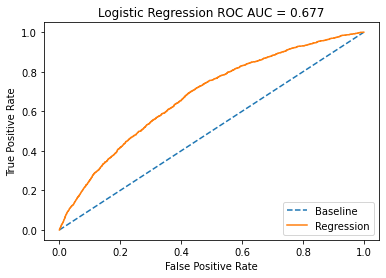

In [96]:
def try_params(model, X_train, y_train, X_test, y_test, C, penalty):
    model = LogisticRegression(C=C, penalty=penalty)
    model.fit(X_train, y_train)
    show_model_result(model, X_test, y_test)
try_params(model, X_train, y_train, X_test, y_test, 21.544346900318832, 'l2')